In [9]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from gwaxion import physics

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

cmap = 'magma'

Imagine we are targeting a specific black hole with initial known mass ($60 M_\odot$) and spin (0.7):

In [3]:
bh = physics.BlackHole(mass=60, chi=0.7, msun=True)

For concreteness, also assume a distance of 5 Mpc:

In [4]:
distance = 5E6 * physics.PC_SI

Let's obtain and plot GW amplitudes and frequencies for a range of $\alpha$'s:

In [11]:
h0rs, fgws, alphas = bh.scan_alphas(alpha_max=0.25, delta_alpha=0.005)

# h0rs are the amplitudes 1m away from the source, so rescale by actual distance
h0s = h0rs / distance

KeyboardInterrupt: 

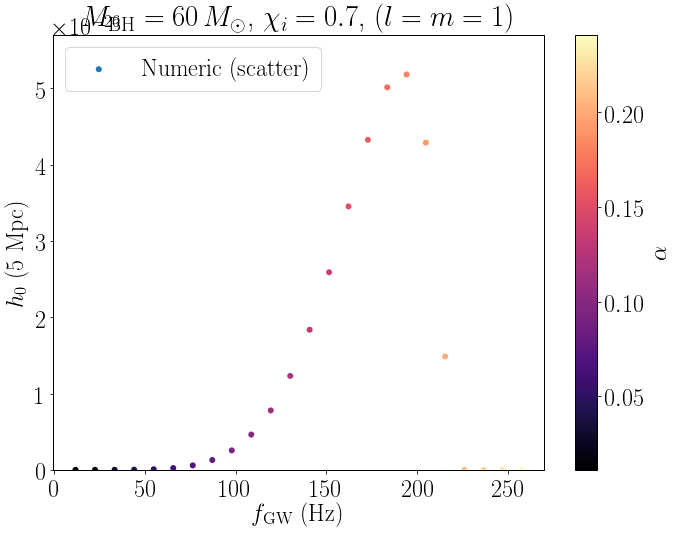

In [10]:
fig, ax = plt.subplots(1, figsize=(11,8))
s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', label='Numeric (scatter)', cmap=cmap)
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_ylim(0, np.nanmax(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.legend(loc="upper left")
plt.show()
plt.close()

In [7]:
print h0s

[           nan 2.66807330e-33 2.16378081e-31 2.90474214e-30
 1.81013002e-29 7.35090514e-29 2.26971407e-28 5.78947913e-28
 1.28194431e-27 2.54346194e-27 4.61852876e-27 7.78710168e-27
 1.23104449e-26 1.83588253e-26 2.59002874e-26 3.45365412e-26
 4.32665952e-26 5.01509118e-26 5.18373188e-26 4.28927497e-26
 1.48589746e-26 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


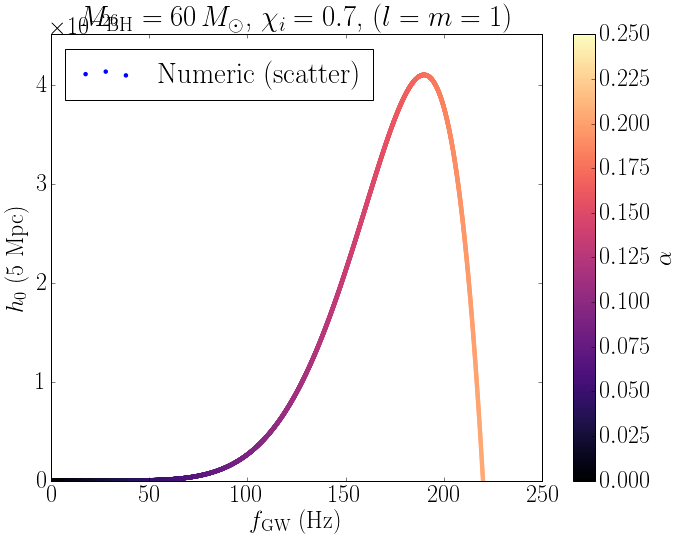

In [19]:
# an equivalent way to produce the above plot is
alphas_2 = np.linspace(0, 0.5, 10000) + 1E-3
h0s_2, fgws_2 = physics.h0_scalar_brito(bh.mass_msun, alphas_2, chi_i=bh.chi, d=distance)

fig, ax = plt.subplots(1, figsize=(11,8))
s = ax.scatter(fgws_2, h0s_2, c=alphas_2, edgecolor='none', label='Numeric (scatter)', cmap=cmap, vmin=0, vmax=0.25)
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_xlim(0, 250)
ax.set_ylim(0, max(h0s_2)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
ax.set_title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
ax.legend(loc="upper left", numpoints=1)
plt.show(fig)


Instead of creating an array of amplitudes, we could have used the internal numerical fit available through the `BlackHole` object:

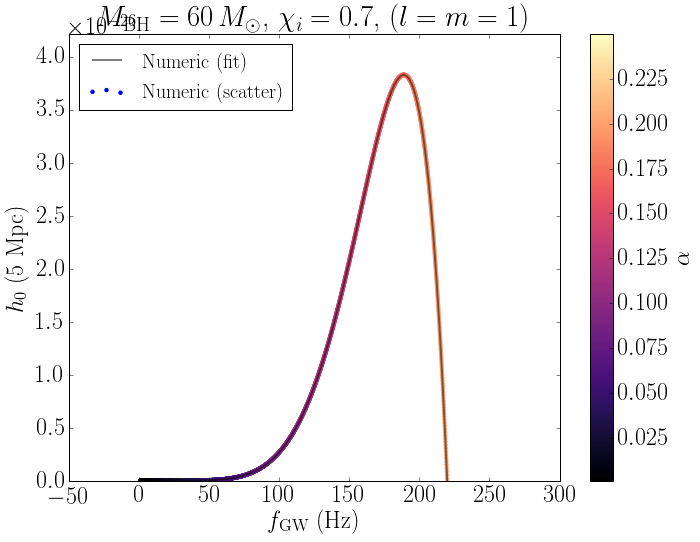

In [115]:
fig, ax = plt.subplots(1, figsize=(11,8))
s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', label='Numeric (scatter)', cmap=cmap)
ax.plot(fgws, bh.h0r_fit(fgws)/distance, lw=2, color='k', alpha=0.5, label="Numeric (fit)")
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_ylim(0, max(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
ax.legend(loc="upper left", fontsize=20)
plt.show()
plt.show(ax)

We can compare this to the analytic approximation by Arvanitaki et al.:

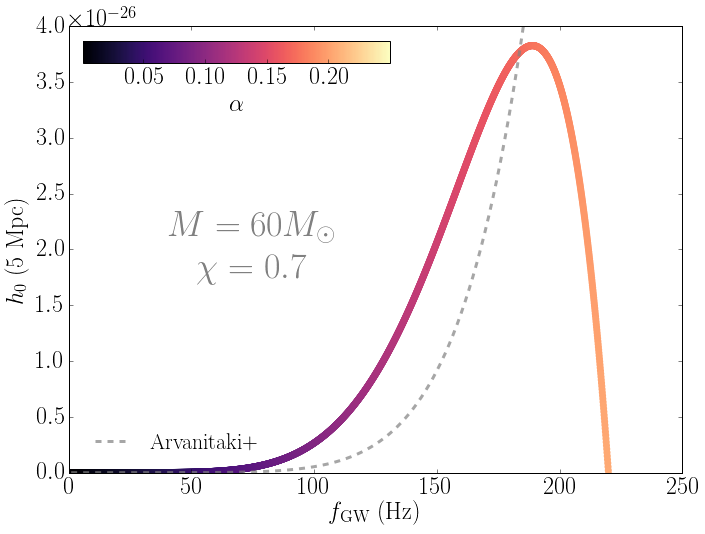

In [116]:
h0r_approx, fgws2 = physics.h0_scalar_approx(alphas, m_bh=bh.mass_msun)

fig, ax = plt.subplots(1, figsize=(11,8))

s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', cmap=cmap, s=50)#, vmin=0)#, vmax=0.2, s=50)
#ax.plot(fgws, bh.h0r_fit(fgws)/distance, lw=2, color='k', alpha=0.5, label="Numeric (fit)")
ax.plot(fgws2, h0r_approx/distance, lw=3, color='gray', ls='--', alpha=0.7, label="Arvanitaki+")

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="50%", height="5%", loc=2)
cb_ticks = np.linspace(0, 0.2, 5)
cb = plt.colorbar(s, label=r'$\alpha$', ticks=cb_ticks, orientation='horizontal', cax=cbaxes)

ax.set_ylim(0, 4E-26)
ax.set_xlim(0, 250)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
ax.legend(loc=3, frameon=False, fontsize=22)#loc="center", bbox_to_anchor=(0.25, 0.75))

ax.annotate(r'$M=60 M_\odot$'+'\n'+r'$\chi=0.7$', xy=(0.3, 0.5), xycoords="axes fraction", 
            ha='center', va='center', fontsize=36, color='gray')

#plt.title(r"$M_{\rm BH}=60\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.show(ax)

#fig.savefig("scat_h0_fgw_alpha.pdf", bbox_inches='tight')

In [137]:
print alphas[h0s.max()==h0s]
print fgws[h0s.max()==h0s]
print h0s.max()

[ 0.1761]
[ 188.93913803]
3.82699460604e-26


TypeError: float() argument must be a string or a number

In [140]:
a = physics.Alpha(alpha=alphas[h0s.max()==h0s], m_bh=60)
a.m_b_ev

array([  3.92215111e-13])